# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../DataSet/cleaned_Telco-Customer-Churn_data.csv")

In [5]:
# Display the first few rows of the dataset
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,-1.277445,0,1,0,0,...,0,0,0,0,0,1,2,-1.160323,-0.994242,0
1,5575-GNVDE,1,0,0,0,0.066327,1,0,0,2,...,2,0,0,0,1,0,3,-0.259629,-0.173244,0
2,3668-QPYBK,1,0,0,0,-1.236724,1,0,0,2,...,0,0,0,0,0,1,3,-0.362660,-0.959674,1
3,7795-CFOCW,1,0,0,0,0.514251,0,1,0,2,...,2,2,0,0,1,0,0,-0.746535,-0.194766,0
4,9237-HQITU,0,0,0,0,-1.236724,1,0,1,0,...,0,0,0,0,0,1,2,0.197365,-0.940470,1


In [7]:
# Display summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(df.describe(include='all'))


Summary statistics of the dataset:
        customerID       gender  SeniorCitizen      Partner   Dependents  \
count         7043  7043.000000    7043.000000  7043.000000  7043.000000   
unique        7043          NaN            NaN          NaN          NaN   
top     7590-VHVEG          NaN            NaN          NaN          NaN   
freq             1          NaN            NaN          NaN          NaN   
mean           NaN     0.504756       0.162147     0.483033     0.299588   
std            NaN     0.500013       0.368612     0.499748     0.458110   
min            NaN     0.000000       0.000000     0.000000     0.000000   
25%            NaN     0.000000       0.000000     0.000000     0.000000   
50%            NaN     1.000000       0.000000     0.000000     0.000000   
75%            NaN     1.000000       0.000000     1.000000     1.000000   
max            NaN     1.000000       1.000000     1.000000     1.000000   

              tenure  PhoneService  MultipleLines  

## Target Variable Distribution

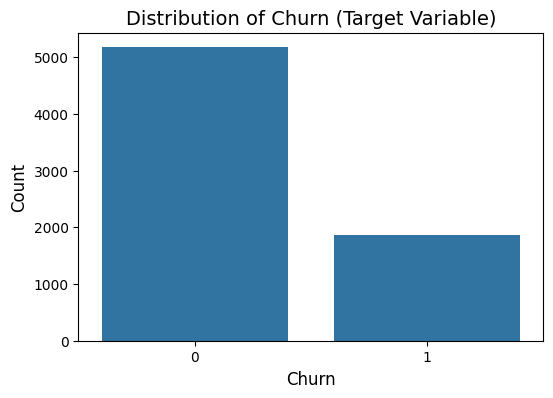

Churn Distribution (%)
 Churn
0    73.46
1    26.54
Name: proportion, dtype: float64


In [9]:
# to find the balance between churn and unchurn classes
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn')

plt.title("Distribution of Churn (Target Variable)", fontsize=14)
plt.xlabel("Churn", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# Percentage distribution
churn_perc = df['Churn'].value_counts(normalize=True) * 100
print("Churn Distribution (%)\n", churn_perc.round(2))

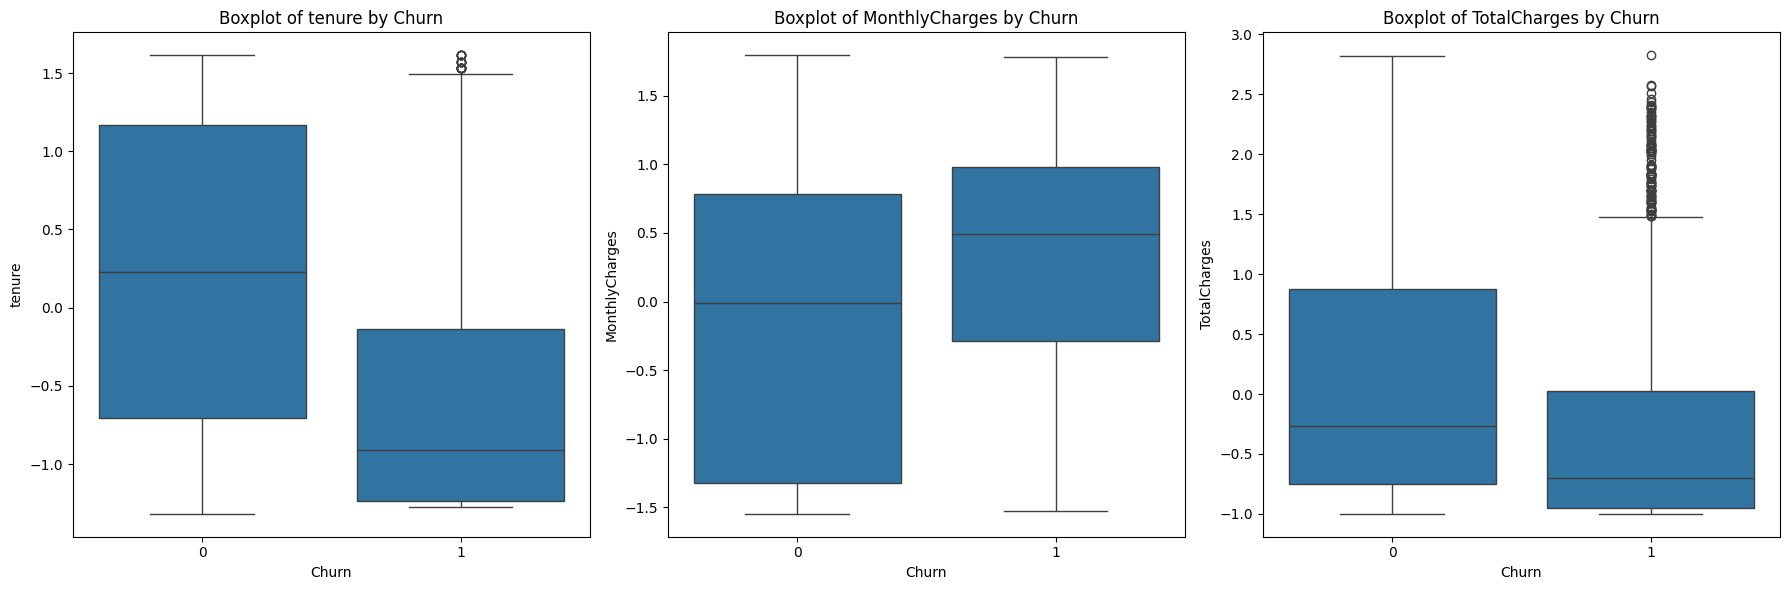

In [11]:
# Plot boxplots of numerical features by 'Churn'
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(18, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Churn')

plt.tight_layout()
plt.show()

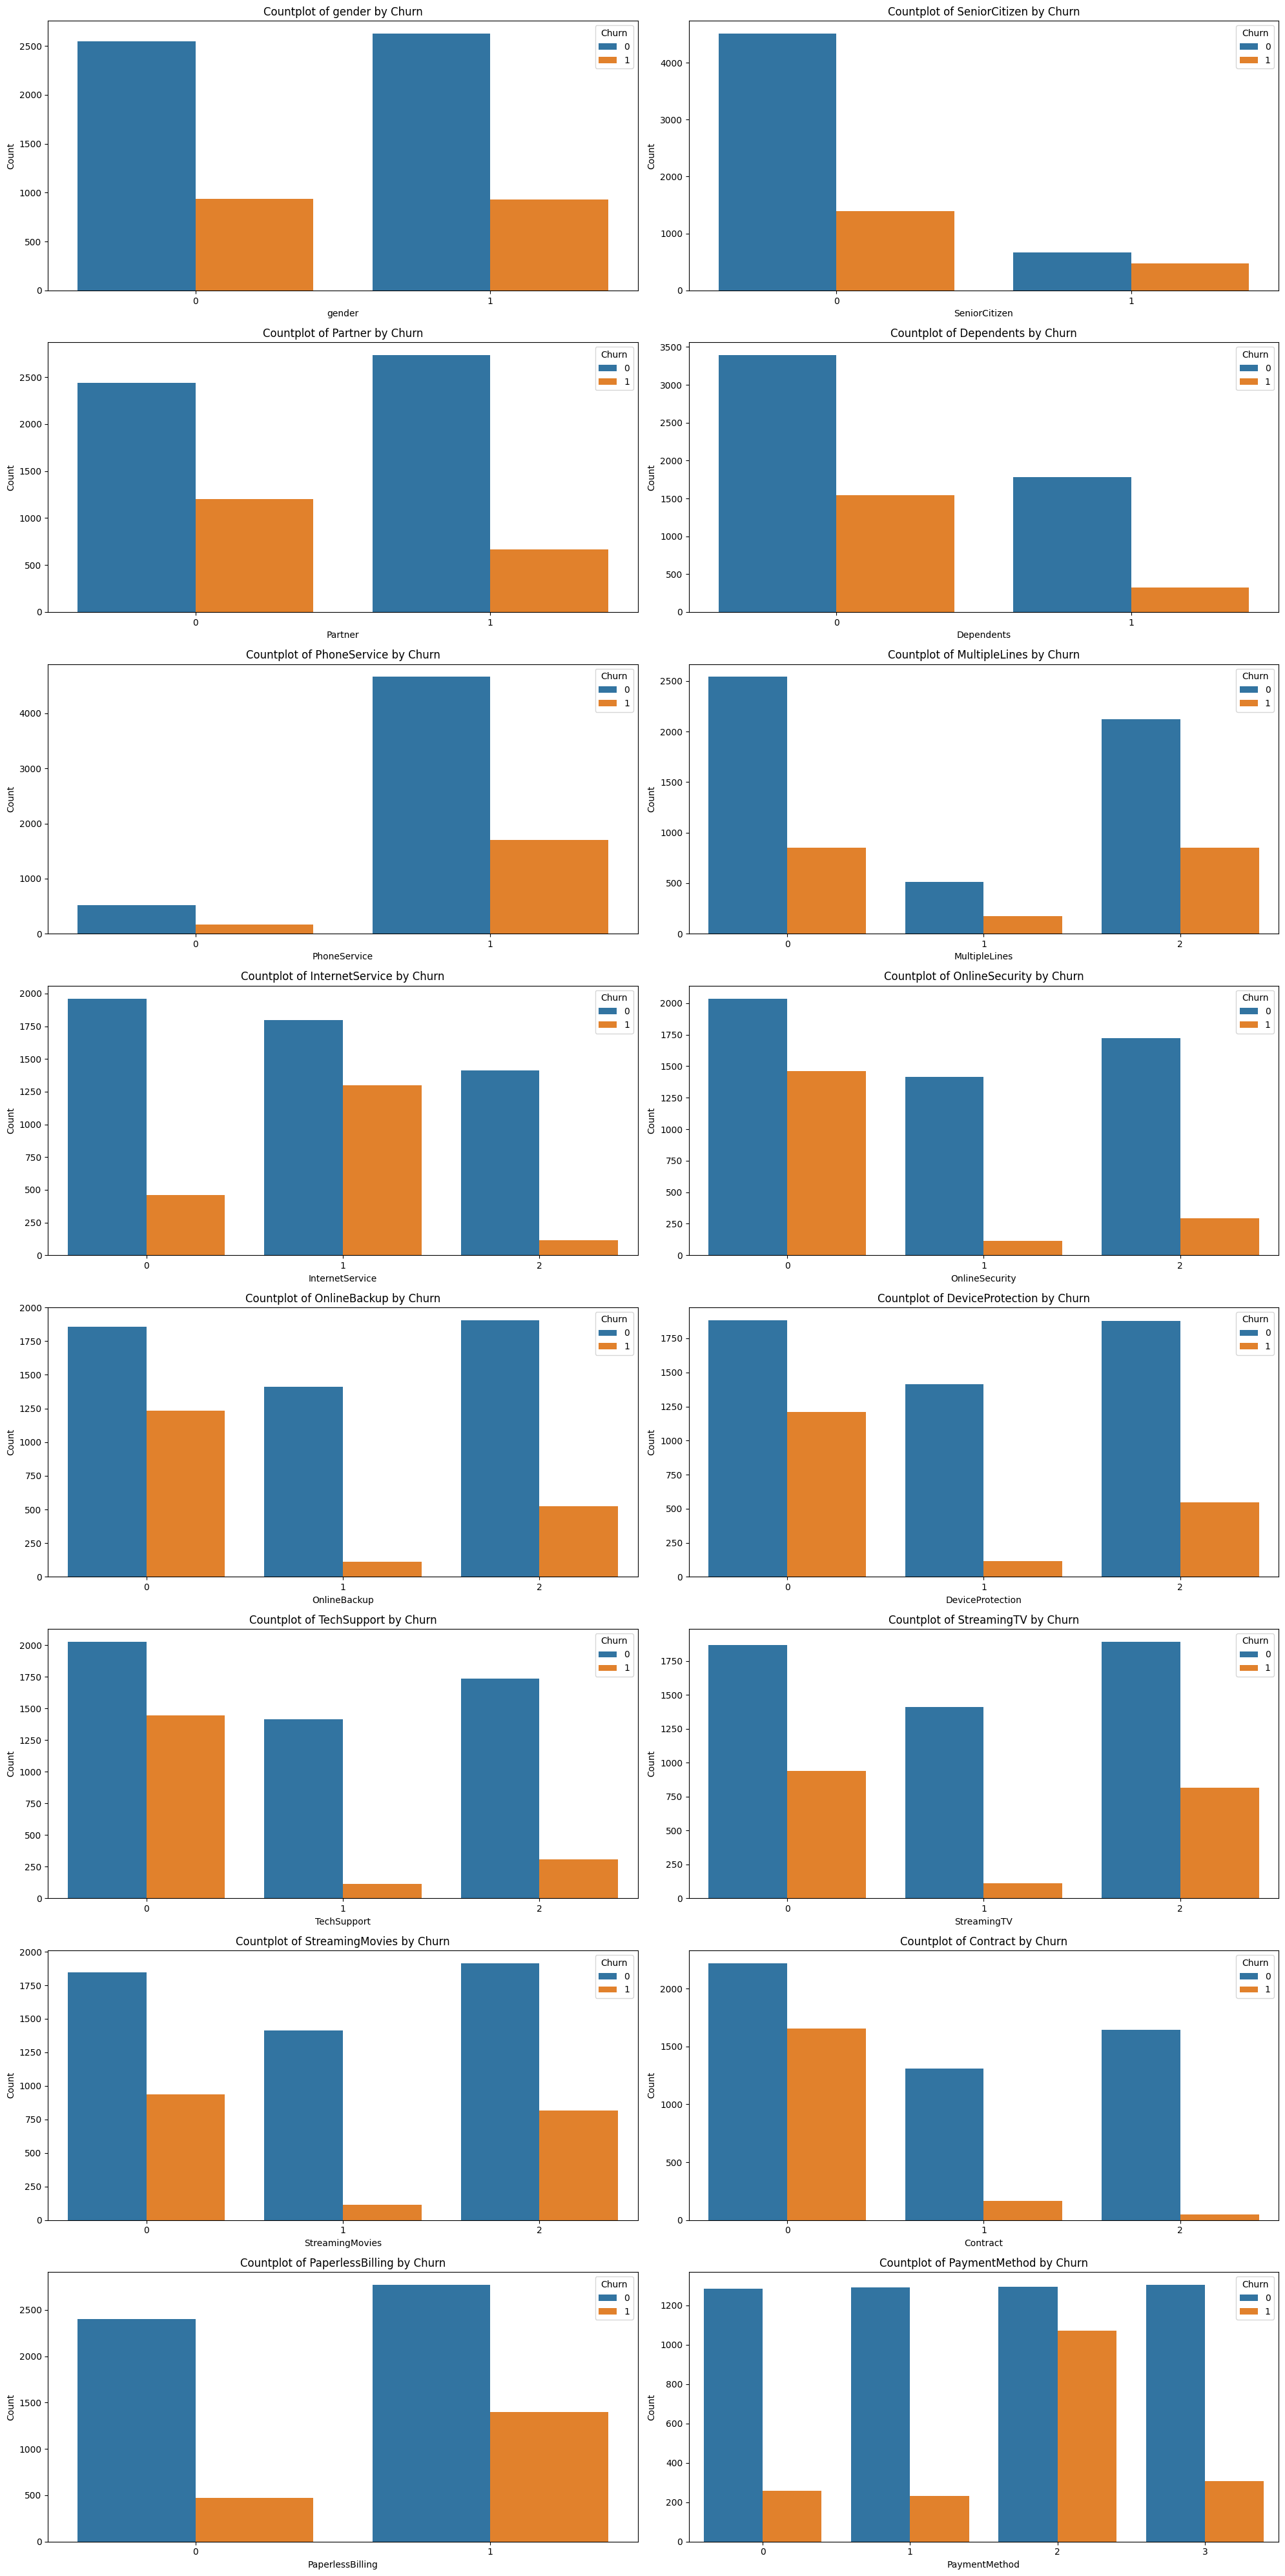

In [13]:
# Plot countplots of categorical features by 'Churn'
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(20, 40))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(8, 2, i)
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Countplot of {feature} by Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

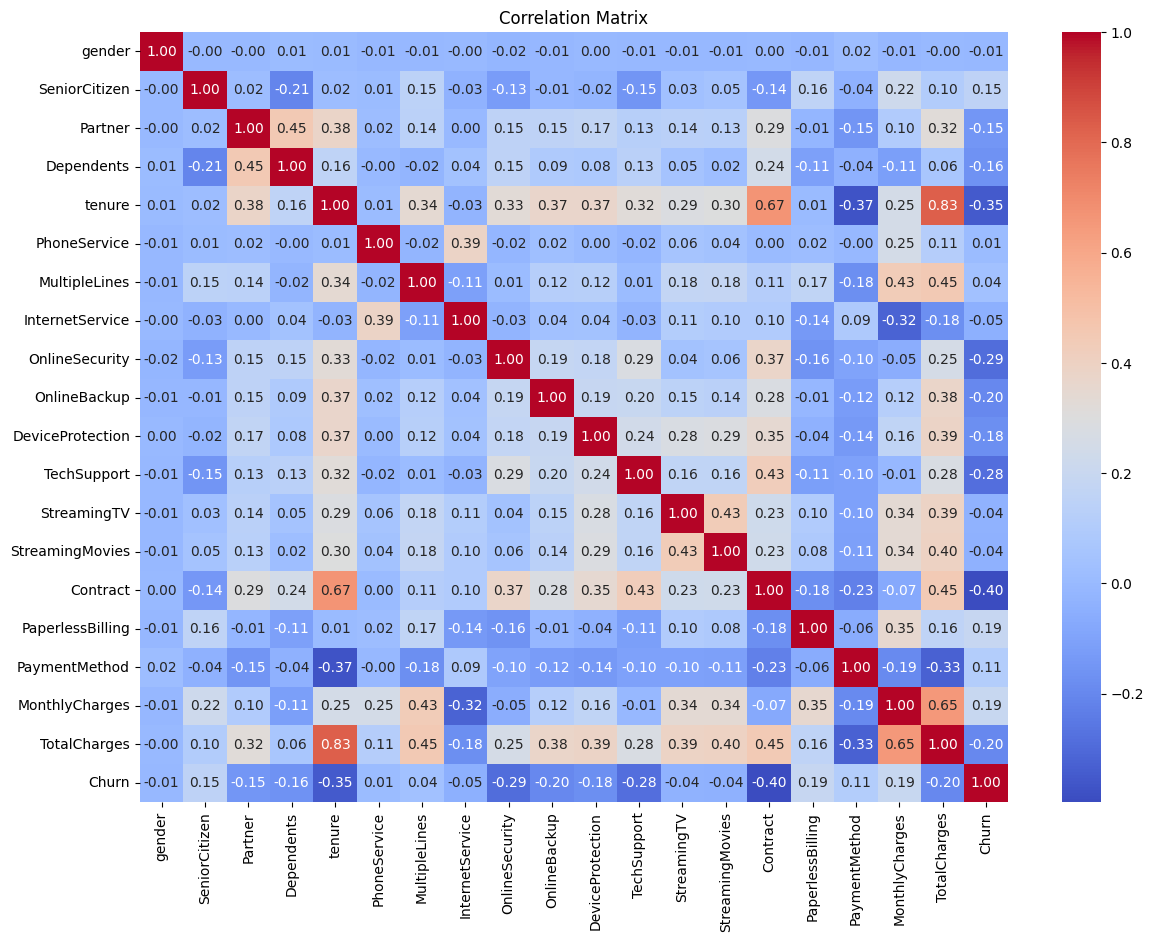

In [15]:
# Exclude non-numeric columns from the correlation matrix calculation
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
print(df['Churn'].unique())
print(df['Churn'].dtype)


[0 1]
int64
